# Assignment 02 - Module 06 | Machine Learning

# Feature Selection Methods:

### PCA 
### RFE
### RF Featore importance
### Statistical bi variate analysis approach

##### All application of feature selection done at the end using grid search and cross validation .

# Data Description

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.


Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 6.0)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [3]:
df=pd.read_csv('telco2.csv')

# Basic Data Exploration
– head of the dataset

– the shape of the dataset

– info of the dataset

– summary of the dataset

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,NaN,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7032, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7023.000000,7032.000000,7025.000000
mean,0.162400,32.430158,64.798208,2282.239317
std,0.368844,24.546817,30.085974,2266.150569
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.500000
50%,0.000000,29.000000,70.350000,1396.900000
75%,0.000000,55.000000,89.862500,3791.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7023 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7029 non-null   object 
 11  DeviceProtection  7025 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              9
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        3
DeviceProtection    7
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

# Handling Missing Values

In [9]:
df.fillna(df.median(), inplace=True)

In [10]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Handling dulicated instances

In [12]:
df.duplicated().sum()


0

There are no duplicated instances in dataset

# Handling Outlier

In [13]:
#Separate out independent categorical variables for conversion into numerical
df_catg=df.loc[:,('gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 
                 'InternetService',    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','SeniorCitizen')]

In [14]:
df_num=df.loc[:,('tenure','MonthlyCharges','TotalCharges')]

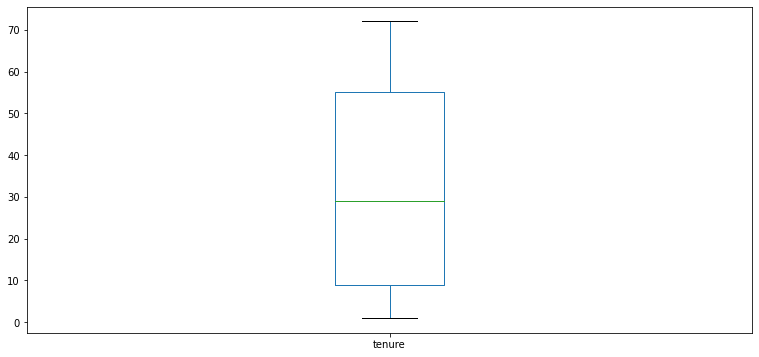

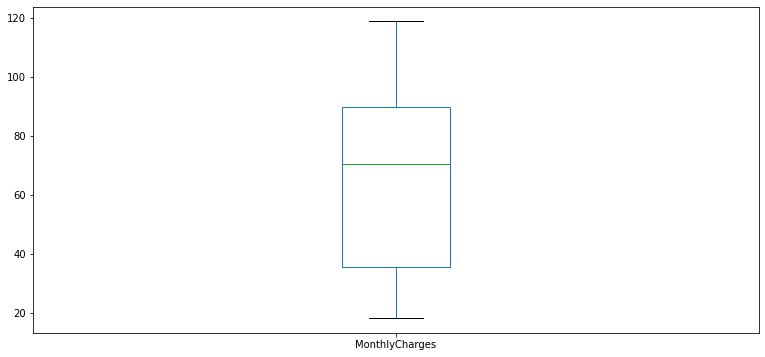

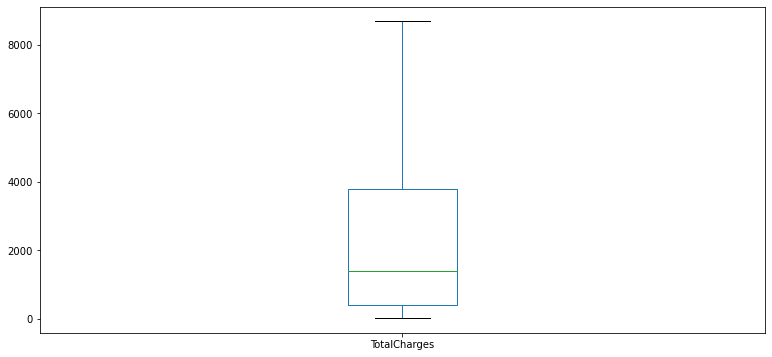

In [15]:
for x in df_num:
    df_num.boxplot(column =[x], grid = False)
    plt.show()

# Doubt
if mean and median is not same, does it infer that outlier is there or infers only skewness of data

second case:
should i remove outliers shown below?

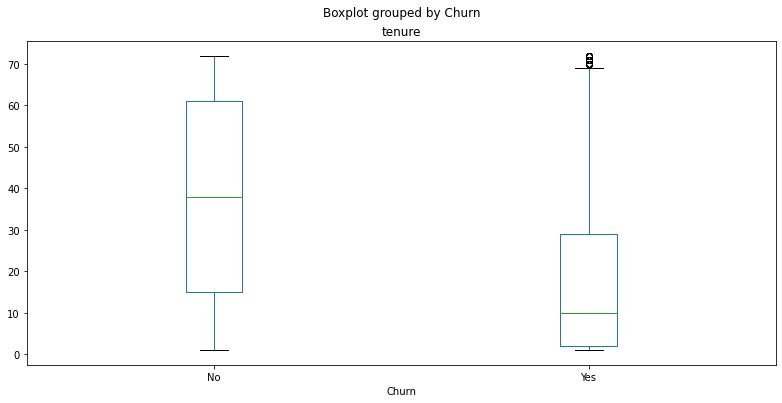

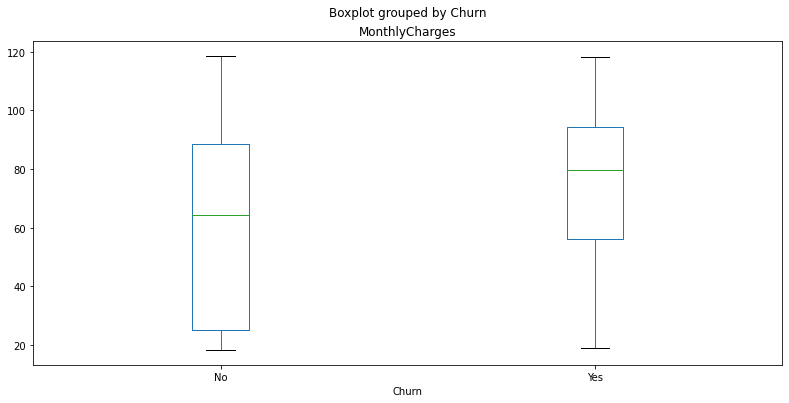

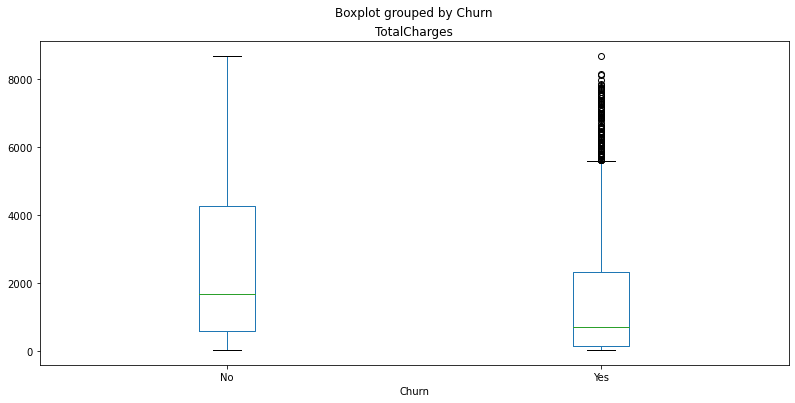

In [16]:
df.boxplot(by ='Churn', column =['tenure'], grid = False)
df.boxplot(by ='Churn', column =['MonthlyCharges'], grid = False)
df.boxplot(by ='Churn', column =['TotalCharges'], grid = False)

# Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215E1743550>,
      dtype=object)

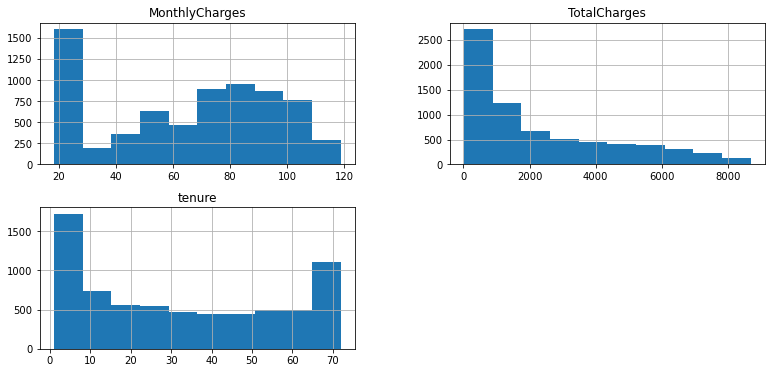

In [17]:
df_num.hist()

# Normality Test

### Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.
### Assumptions
Observations in each sample are independent and identically distributed (iid).
### Interpretation
H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [18]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
for x in df_num:
    stat, p = shapiro(df_num[x][:3000,])
    print('\033[1m' + "\nDistribution check of {}".format(x) + '\033[0m')
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')


Distribution check of tenure
stat=0.904, p=0.000
Probably not Gaussian

Distribution check of MonthlyCharges
stat=0.918, p=0.000
Probably not Gaussian

Distribution check of TotalCharges
stat=0.860, p=0.000
Probably not Gaussian


In [19]:
(df.groupby("Churn").size()/len(df))*100

Churn
No     73.421502
Yes    26.578498
dtype: float64

In [20]:
len(df)

7032

# INSIGHTS
Data distribution is same for groups in variables except “Dependents”, “Online Security”, “Tech Support”, “Contract” and
“Senior Citizen”. These variables can mislead us to detect variables which are most important variables to predict target variable.
While splitting the data in test and train, need to be careful.


In [21]:
for x in df_catg:
    print('\033[1m' + "\nPercentage of frequency count of {}".format(x) + '\033[0m')
    print((df_catg[x].value_counts()/len(df))*100)


Percentage of frequency count of gender
Male      50.469283
Female    49.530717
Name: gender, dtype: float64

Percentage of frequency count of Partner
No     51.749147
Yes    48.250853
Name: Partner, dtype: float64

Percentage of frequency count of Dependents
No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64

Percentage of frequency count of PhoneService
Yes    90.32992
No      9.67008
Name: PhoneService, dtype: float64

Percentage of frequency count of MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: MultipleLines, dtype: float64

Percentage of frequency count of InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64

Percentage of frequency count of OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: OnlineSecurity, dtype: float64

Percentage of frequency count of On

# Bi-variate Analysis

# Graphical Insights
Tenure and total charges is inversly propotional to chances to churn the service.

monthly charges is directly propotional to chances to churn the service.


bar chart between churn and tenure
         average  min   max
Churn                      
No     37.653690  1.0  72.0
Yes    17.983949  1.0  72.0


Text(0.5, 1.0, 'Churn by group and tenure')


bar chart between churn and MonthlyCharges
         average    min     max
Churn                          
No     61.307408  18.25  118.75
Yes    74.441332  18.85  118.35


Text(0.5, 1.0, 'Churn by group and MonthlyCharges')


bar chart between churn and TotalCharges
           average    min      max
Churn                             
No     2553.115291  18.80  8672.45
Yes    1530.644864  18.85  8684.80


Text(0.5, 1.0, 'Churn by group and TotalCharges')

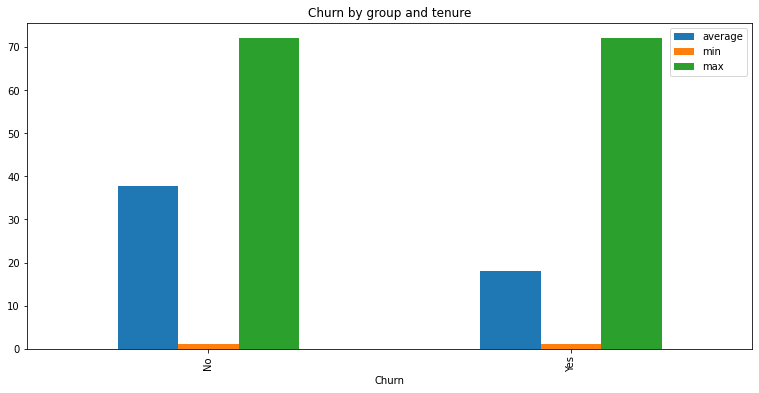

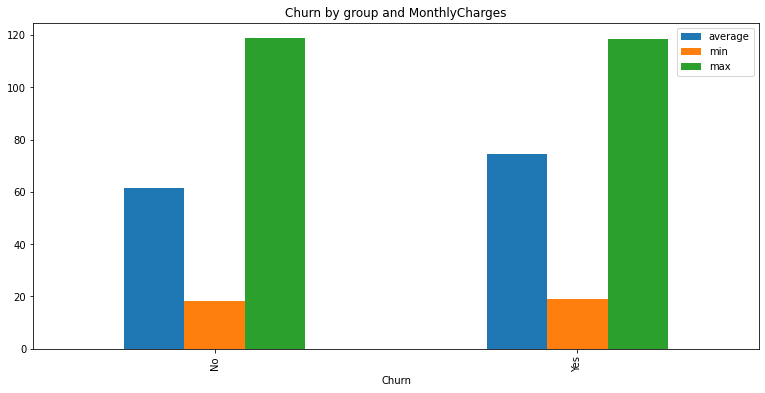

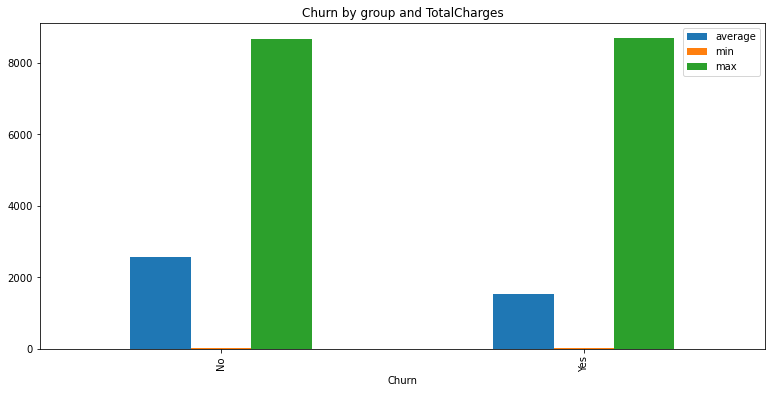

In [22]:
for x in df_num:
    print('\033[1m' + "\nbar chart between churn and {}".format(x) + '\033[0m')
    df_grp = df.groupby(df['Churn'])[x]
    xx = pd.concat(
        [df_grp.mean().rename('average'), df_grp.min().rename('min'), 
         df_grp.max().rename('max')],
        axis=1)
    print(xx)
    xx.plot.bar().set_title('Churn by group and {}'.format(x))
    

    

Features are dropped when they do not contribute significantly to the model. For example, gender (whether male or female) and phone related services, customers are equally likely to churn, because the ratio of churn and non-churn customers are the same.


A good feature is when we can distinguish between churn and non-churn customers, especially when the ratio is different. For example, those with month-to-month contract are more likely to leave, which is logical as they are not bounded by yearly contracts.


bar chart between churn and gender
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by gender Type')

Text(-0.075, 19.70947123765253, '49%')

Text(0.9249999999999999, 20.290528762347474, '51%')

Text(-0.075, 69.36998628032714, '50%')

Text(0.9249999999999999, 70.63001371967286, '50%')


bar chart between churn and Partner
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by Partner Type')

Text(-0.075, 18.895990703079605, '47%')

Text(0.9249999999999999, 21.104009296920395, '53%')

Text(-0.075, 72.92215974325279, '64%')

Text(0.9249999999999999, 67.07784025674722, '36%')


bar chart between churn and Dependents
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by Dependents Type')

Text(-0.075, 26.26380011621151, '66%')

Text(0.9249999999999999, 13.736199883788496, '34%')

Text(-0.075, 98.68250724612, '83%')

Text(0.9249999999999999, 41.31749275388002, '17%')


bar chart between churn and PhoneService
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by PhoneService Type')

Text(-0.075, 3.9511911679256246, '10%')

Text(0.9249999999999999, 36.04880883207438, '90%')

Text(-0.075, 13.516287176100846, '9%')

Text(0.9249999999999999, 126.48371282389917, '91%')


bar chart between churn and MultipleLines
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by MultipleLines Type')

Text(-0.075, 19.647491768351735, '49%')

Text(0.9249999999999999, 3.9511911679256246, '10%')

Text(1.925, 16.40131706372264, '41%')

Text(-0.075, 67.28887388315863, '45%')

Text(0.9249999999999999, 13.516287176100844, '9%')

Text(1.925, 59.194838940740524, '45%')


bar chart between churn and InternetService
Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by InternetService Type')

Text(-0.075, 15.161727677706759, '38%')

Text(0.9249999999999999, 13.937633159016077, '35%')

Text(1.925, 10.900639163277164, '27%')

Text(-0.075, 47.727754186241214, '25%')

Text(0.9249999999999999, 62.60224234109289, '69%')

Text(1.925, 29.67000347266589, '6%')


bar chart between churn and OnlineSecurity
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by OnlineSecurity Type')

Text(-0.075, 15.773774937052103, '39%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 13.325585899670735, '33%')

Text(-0.075, 70.70249512754197, '78%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 39.62750139979214, '16%')


bar chart between churn and OnlineBackup
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1407   113
Yes                  1901   523


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by OnlineBackup Type')

Text(-0.075, 14.371489444121636, '36%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 14.727871392601202, '37%')

Text(-0.075, 62.31716662796059, '66%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 48.01282989937352, '28%')


bar chart between churn and DeviceProtection
Churn                  No   Yes
DeviceProtection               
No                   1885  1211
No internet service  1407   113
Yes                  1871   545


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by DeviceProtection Type')

Text(-0.075, 14.603912453999612, '37%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 14.495448382723223, '36%')

Text(-0.075, 62.42738413125372, '65%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 47.90261239608039, '29%')


bar chart between churn and TechSupport
Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by TechSupport Type')

Text(-0.075, 15.696300600426108, '39%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 13.403060236296728, '34%')

Text(-0.075, 70.18778199865757, '77%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 40.14221452867655, '17%')


bar chart between churn and StreamingTV
Churn                  No  Yes
StreamingTV                   
No                   1867  942
No internet service  1407  113
Yes                  1889  814


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by StreamingTV Type')

Text(-0.075, 14.464458648072828, '36%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 14.63490218865001, '37%')

Text(-0.075, 56.32166026384178, '50%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 54.008336263492325, '44%')


bar chart between churn and StreamingMovies
Churn                  No  Yes
StreamingMovies               
No                   1843  938
No internet service  1407  113
Yes                  1913  818


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by StreamingMovies Type')

Text(-0.075, 14.278520240170444, '36%')

Text(0.9249999999999999, 10.900639163277164, '27%')

Text(1.925, 14.820840596552394, '37%')

Text(-0.075, 55.77120696746731, '50%')

Text(0.9249999999999999, 29.67000347266589, '6%')

Text(1.925, 54.5587895598668, '44%')


bar chart between churn and Contract
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by Contract Type')

Text(-0.075, 17.199302730970366, '43%')

Text(0.9249999999999999, 10.11814836335464, '25%')

Text(1.925, 12.682548905674997, '32%')

Text(-0.075, 78.41826752833549, '89%')

Text(0.9249999999999999, 28.84807288805487, '9%')

Text(1.925, 32.733659583609644, '3%')


bar chart between churn and PaperlessBilling
Churn               No   Yes
PaperlessBilling            
No                2395   469
Yes               2768  1400


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by PaperlessBilling Type')

Text(-0.075, 18.555103621925237, '46%')

Text(0.9249999999999999, 21.444896378074763, '54%')

Text(-0.075, 56.4252122383337, '25%')

Text(0.9249999999999999, 83.5747877616663, '75%')


bar chart between churn and PaymentMethod
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by PaymentMethod Type')

Text(-0.075, 9.947704822777455, '25%')

Text(0.9249999999999999, 9.986441991090452, '25%')

Text(1.925, 10.025179159403448, '25%')

Text(2.9250000000000003, 10.040674026728647, '25%')

Text(-0.075, 30.390931398837697, '14%')

Text(0.9249999999999999, 29.93132702159986, '12%')

Text(1.925, 47.98429621311536, '57%')

Text(2.9250000000000003, 31.693445366447087, '16%')


bar chart between churn and SeniorCitizen
Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by SeniorCitizen Type')

Text(-0.075, 34.84020918070889, '87%')

Text(0.9249999999999999, 5.159790819291111, '13%')

Text(-0.075, 116.91325703416922, '75%')

Text(0.9249999999999999, 23.086742965830773, '25%')

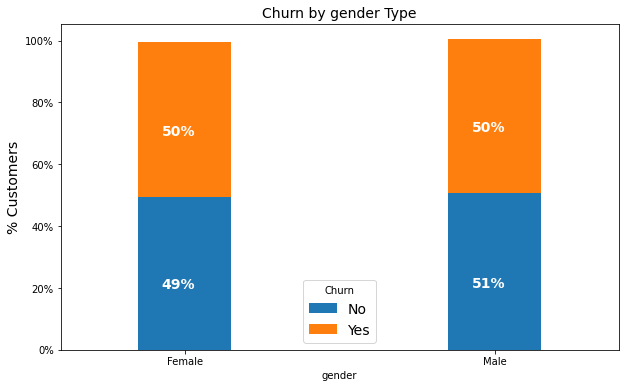

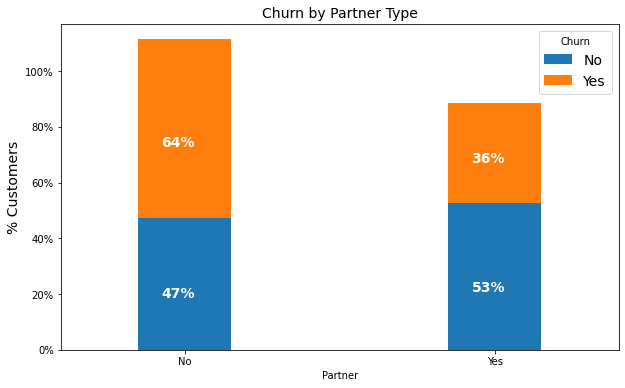

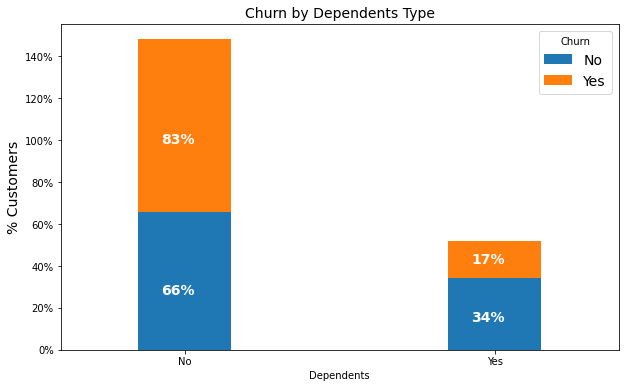

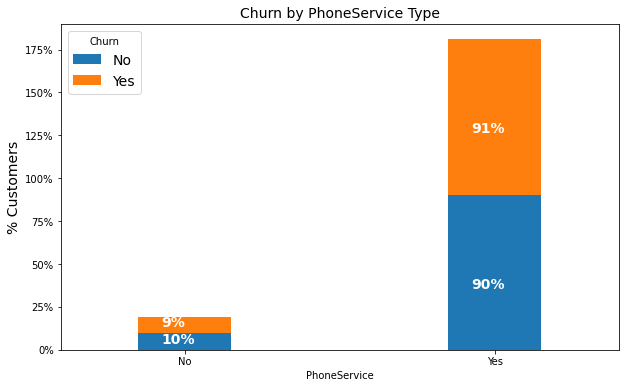

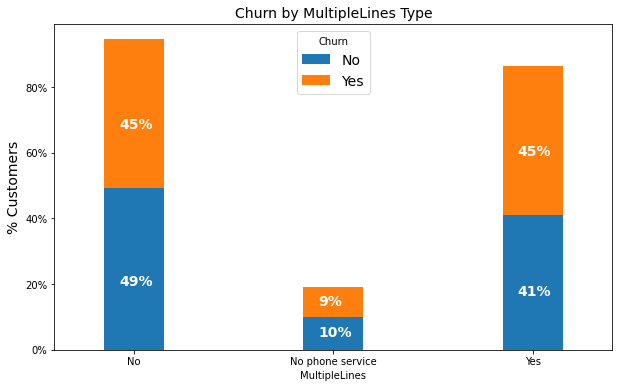

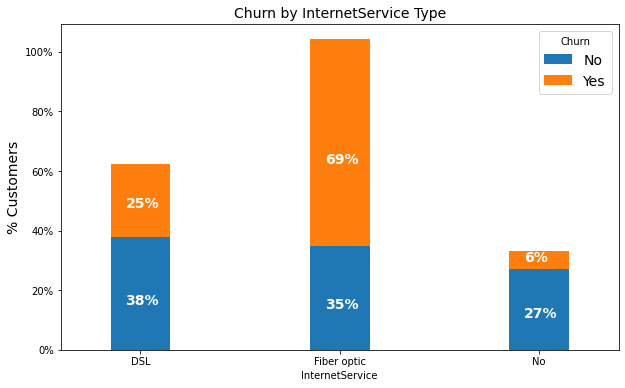

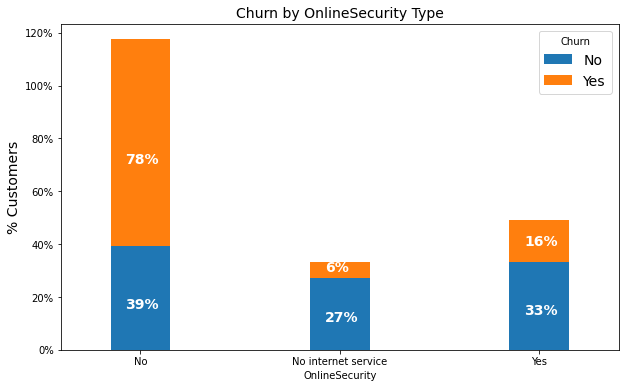

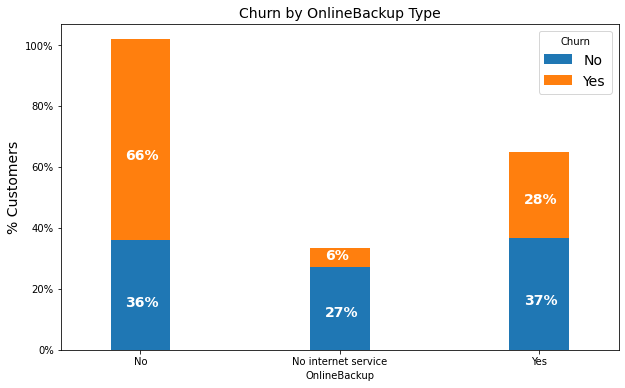

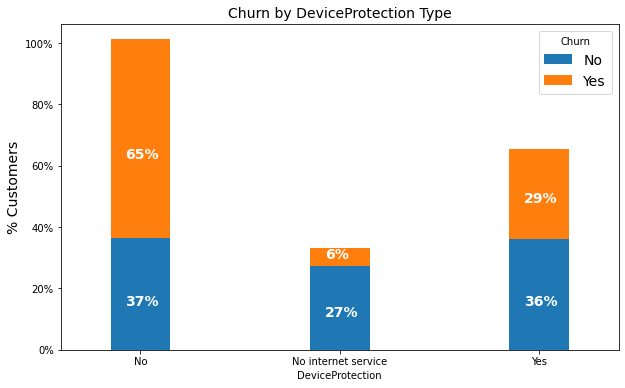

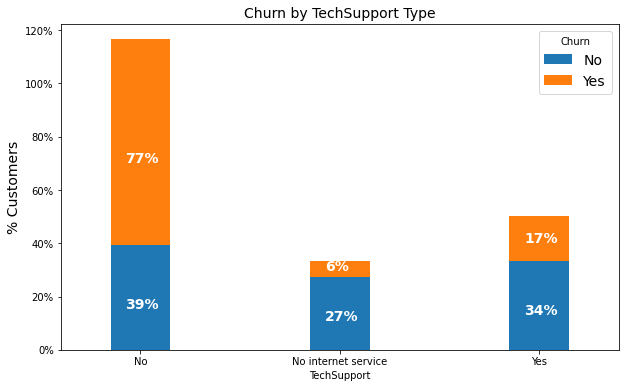

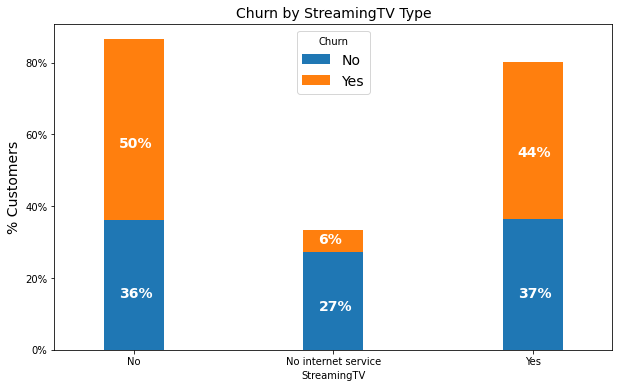

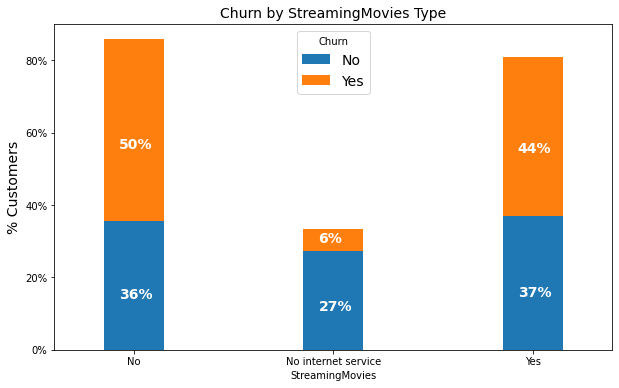

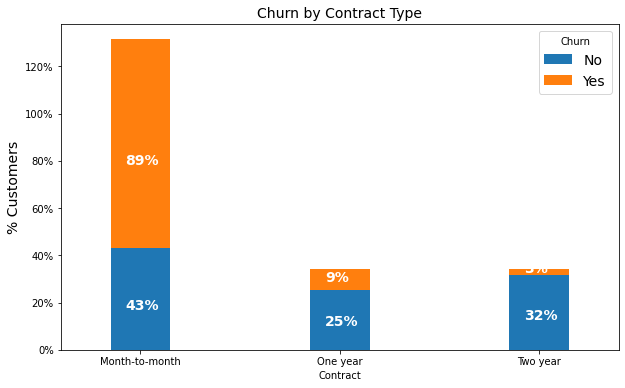

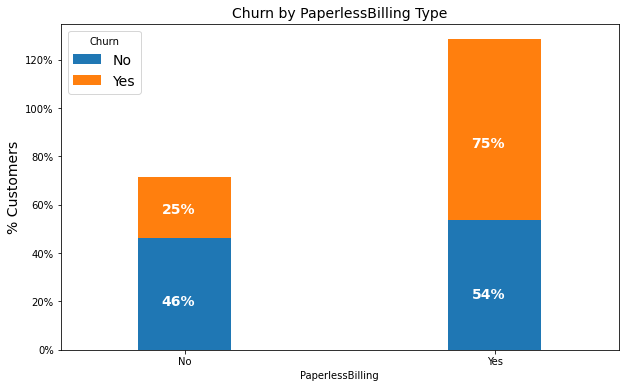

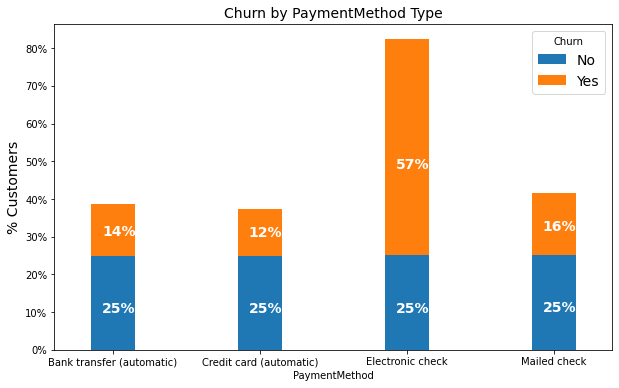

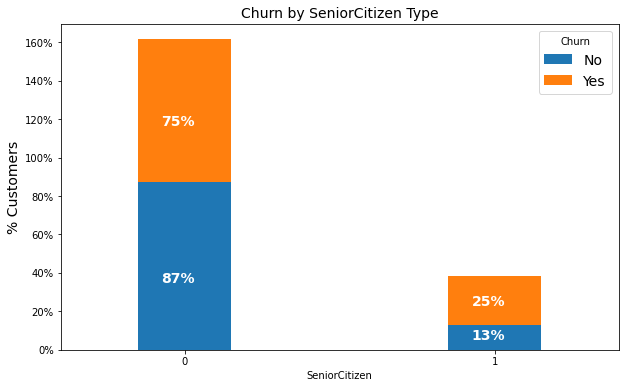

In [23]:
for x in df_catg:
    print('\033[1m' + "\nbar chart between churn and {}".format(x) + '\033[0m')
    data_crosstab = pd.crosstab(df[x],df['Churn'],  
                               margins = False) 
    print(data_crosstab)
    ax = (data_crosstab*100.0 / data_crosstab.sum()).plot(kind='bar',
                                                                    width = 0.3,
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (10,6))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='best',prop={'size':14},title = 'Churn')
    ax.set_ylabel('% Customers',size = 14)
    ax.set_title('Churn by {} Type'.format(x),size = 14)

    # Code to add the data labels on the stacked bar chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)

# Multi-variate Analysis

### Partner, Gender and Churn Graphical Analysis

Churn       No          Yes     
gender  Female  Male Female Male
Partner                         
No        1180  1259    620  580
Yes       1364  1360    319  350


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by gender,Partner Type')

Text(-0.075, 9.141971721867131, '23%')

Text(0.9249999999999999, 9.754018981212475, '24%')

Text(1.925, 10.567499515785396, '26%')

Text(2.9250000000000003, 10.536509781135, '26%')

Text(-0.075, 36.12405718053728, '33%')

Text(0.9249999999999999, 36.798102562715506, '31%')

Text(1.925, 33.24592909978987, '17%')

Text(2.9250000000000003, 33.83191115695735, '19%')

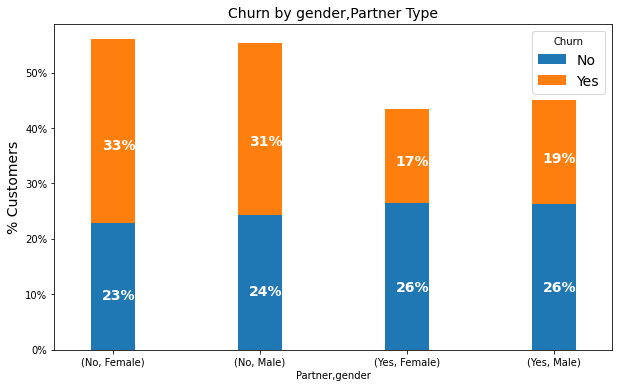

In [24]:
#Multi-variate Contingency Table
data_crosstab1 = pd.crosstab([df["Partner"],df["gender"] ],
                            df['Churn'],  
                               margins = False) 
print(data_crosstab1.unstack())
ax = (data_crosstab1*100.0 / data_crosstab1.sum()).plot(kind='bar',
                                                                    width = 0.3,
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by gender,Partner Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Phoneservice, MultipleLines and churn Graphical analysis

Churn              No                             Yes                        
MultipleLines      No No phone service     Yes     No No phone service    Yes
PhoneService                                                                 
No                NaN            510.0     NaN    NaN            170.0    NaN
Yes            2536.0              NaN  2117.0  849.0              NaN  850.0


Text(0, 0.5, '% Customers')

Text(0.5, 1.0, 'Churn by PhoneService, MultipleLines Type')

Text(-0.075, 3.9511911679256246, '10%')

Text(0.9249999999999999, 19.647491768351735, '49%')

Text(1.925, 16.40131706372264, '41%')

Text(-0.075, 13.516287176100846, '9%')

Text(0.9249999999999999, 67.28887388315863, '45%')

Text(1.925, 59.194838940740524, '45%')

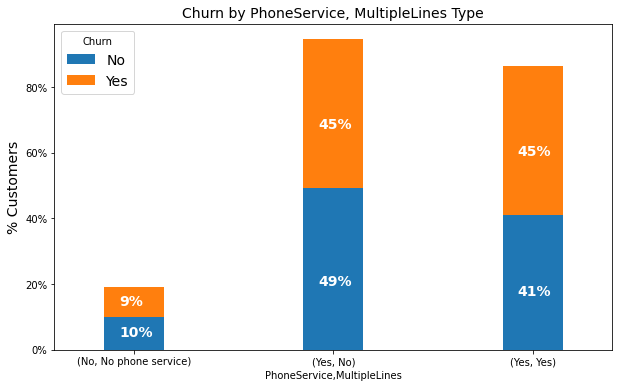

In [25]:
data_crosstab2 = pd.crosstab([df["PhoneService"],df["MultipleLines"] ],
                            df['Churn'],  
                               margins = False) 
print(data_crosstab2.unstack())
ax = (data_crosstab2*100.0 / data_crosstab2.sum()).plot(kind='bar',
                                                                    width = 0.3,
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by PhoneService, MultipleLines Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# Chi-Squared Test
Tests whether two categorical variables are related or independent.

### Assumptions
Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.

### Interpretation
H0: the two samples are independent.

H1: there is a dependency between the samples.

In [26]:
# Example of the Chi-Squared Test

from scipy.stats import chi2_contingency
for x in df_catg:
    print('\033[1m' + "\nChi-Squared Test between churn and {}".format(x) + '\033[0m')
    data_crosstab = pd.crosstab(df[x],df['Churn'],  
                               margins = False)

    print(data_crosstab)
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    print('stat=%.3f, p=%.3f' % (stat, p))
    #H0: the two samples are independent.
    #H1: there is a dependency between the samples.
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')


Chi-Squared Test between churn and gender
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930
stat=0.475, p=0.490
Probably independent

Chi-Squared Test between churn and Partner
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669
stat=157.503, p=0.000
Probably dependent

Chi-Squared Test between churn and Dependents
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326
stat=186.322, p=0.000
Probably dependent

Chi-Squared Test between churn and PhoneService
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699
stat=0.874, p=0.350
Probably independent

Chi-Squared Test between churn and MultipleLines
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850
stat=11.272, p=0.004
Probably dependent

Chi-Squared Test between churn and InternetService
Churn              No   Yes

### Result
Gender and Phone services are not associated with target variable.

In [27]:
#dropping gender and phone service
df_catg=df.loc[:,('Partner', 'Dependents', 'MultipleLines', 
                 'InternetService',    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','SeniorCitizen')]

# Finding Correlation 

Doubt
How can we check multicollinearity between cat and cat vars

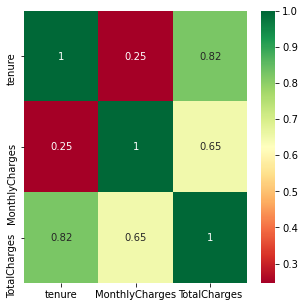

In [28]:
plt.subplots(figsize=(5,5))
sns.heatmap(df_num.corr(),cmap='RdYlGn',annot=True)
plt.show();

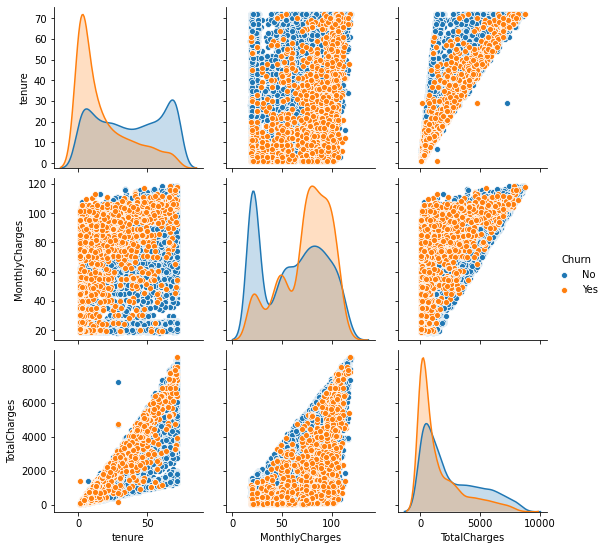

In [29]:
#check which variables have high correlations and distinctive patterns with the churning response
sns.pairplot(pd.concat([df_num,df['Churn']],axis=1), hue = "Churn")
plt.show()

# Independent/ 2 sample/ student's/Unpaired t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.

Interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.

### Normality Check

Visualy we can check from above graph there is no normality for data distribution for two groups(Churners and non-churners).

### Scale variable Transformation using quantile Transformer

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#quantiletransformer-gaussian-output

In [30]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=4)
df_num1 = quantile_transformer.fit_transform(df.loc[:,('tenure','MonthlyCharges','TotalCharges')])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215E19A5B20>,
      dtype=object)

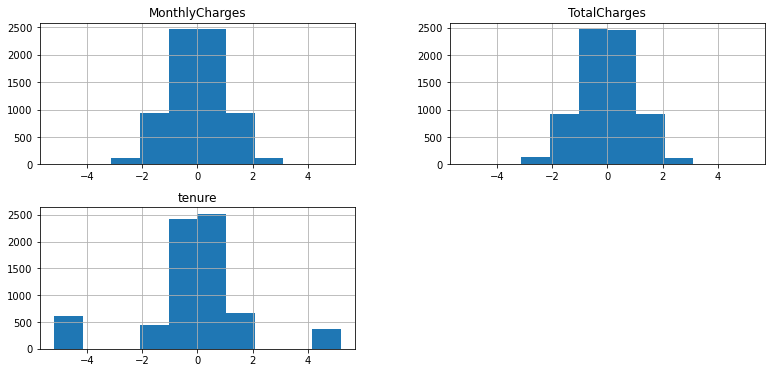

In [31]:
df_num1 = pd.DataFrame(df_num1, columns = ['tenure','MonthlyCharges','TotalCharges'])
df_num1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215E1162D00>,
      dtype=object)

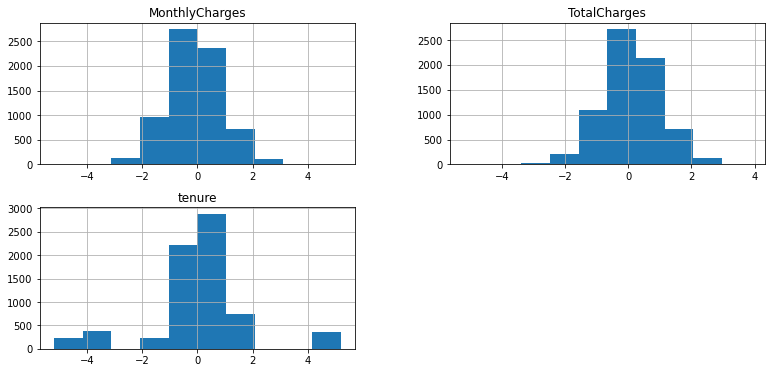

In [32]:
scaler = preprocessing.RobustScaler()
r_df_y = scaler.fit_transform(df_num1[(df['Churn'] == 'Yes')])
r_df_y = pd.DataFrame(r_df_y, columns =df_num1.columns, index = df_num1[(df['Churn'] == 'Yes')].index)
df_num2 = pd.concat([r_df_y,df_num1[(df['Churn'] == 'No')]], axis=0,ignore_index=True)
df_num2.hist()

### Visual check of normality after transformation

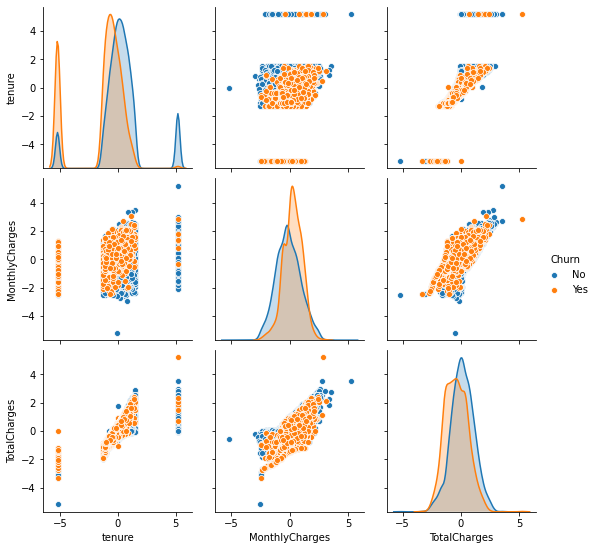

In [33]:
Churn_yes = df_num1[(df['Churn'] == 'Yes')]
Churn_no = df_num1[(df['Churn'] == 'No')]
#check which variables have high correlations and distinctive patterns with the churning response
sns.pairplot(pd.concat([df_num1,df['Churn']],axis=1), hue = "Churn")
plt.show()

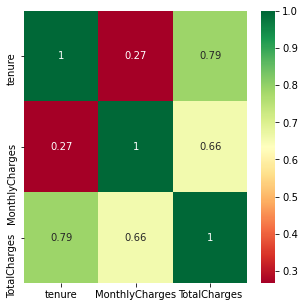

In [34]:
plt.subplots(figsize=(5,5))
sns.heatmap(df_num1.corr(),cmap='RdYlGn',annot=True)
plt.show();

In [35]:
Churn_no

,tenure,MonthlyCharges,TotalCharges
0,-5.199338,-0.730650,-1.920459
1,0.114185,-0.273595,0.206188
3,0.375793,-0.618521,-0.000549
6,-0.191052,0.624196,0.225567
7,-0.619855,-0.731412,-0.794462
...,...,...,...
7026,5.199338,-0.984109,0.014796
7027,-0.139710,0.477513,0.237005
7028,5.199338,1.305135,-0.000549
7029,-0.574460,-0.732668,-0.731709


In [36]:
Churn_yes = df_num1[(df['Churn'] == 'Yes')]
Churn_no = df_num1[(df['Churn'] == 'No')]
for x in Churn_yes:
    print('\033[1m' + "\nDistribution check of {}".format(x) + ' for Churner group' + '\033[0m')
    stat, p = shapiro(Churn_yes[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print('\033[1m' + "\nDistribution check of {}".format(x) + ' for non-Churner group' + '\033[0m')
    stat, p = shapiro(Churn_no[x].sample(n=5000,random_state =4))
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')


Distribution check of tenure for Churner group
stat=0.767, p=0.000
Probably not Gaussian

Distribution check of tenure for non-Churner group
stat=0.798, p=0.000
Probably not Gaussian

Distribution check of MonthlyCharges for Churner group
stat=0.994, p=0.000
Probably not Gaussian

Distribution check of MonthlyCharges for non-Churner group
stat=0.996, p=0.000
Probably not Gaussian

Distribution check of TotalCharges for Churner group
stat=0.991, p=0.000
Probably not Gaussian

Distribution check of TotalCharges for non-Churner group
stat=0.998, p=0.000
Probably not Gaussian


# Levene’s Test and Bartlett’s Test - Equality of variance test

What is Equality of Variances?

equality of variances, also known as homoscedasticity, is when the variances are approximately the same across the samples (i.e., groups). If our samples have unequal variances (heteroscedasticity), on the other hand, it can affect the Type I error rate and lead to false positives. This is, basically, what equality of variances means.

H0: the variances are equal across all samples/groups

H1: the variances are not equal across all samples/groups

    

In [37]:
df['Churn'] = df['Churn'].replace(to_replace =["No","Yes"], 
                 value =[0,1])



In [38]:
# If data is not following a normal distribution Levene’s test is preferred
from scipy.stats import levene
for x in df_num2:
    print('\033[1m' + "\nEquality of variance test for {}".format(x) + '\033[0m')
    stat, p = levene(Churn_yes[x], Churn_no[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('the variances are equal across all samples/groups')
    else:
        print('the variances are not equal across all samples/groups')


Equality of variance test for tenure
stat=45.839, p=0.000
the variances are not equal across all samples/groups

Equality of variance test for MonthlyCharges
stat=163.348, p=0.000
the variances are not equal across all samples/groups

Equality of variance test for TotalCharges
stat=0.966, p=0.326
the variances are equal across all samples/groups


# Taking Heteroscedasticity is in consideration and data is not following a normal distribution
# Applying Wilcoxon Rank Sum Test for variables

H0: the Wilcoxon rank-sum statistic of the samples are equal.

H1: the Wilcoxon rank-sum statistic of the samples are unequal.

In [39]:
from scipy.stats import ranksums
for x in df_num2:
    stat,p = ranksums(Churn_yes[x], Churn_no[x])
    print('\033[1m' + "\nWilcoxon Rank Sum test for {}".format(x) + '\033[0m')
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('the Wilcoxon rank-sum statistic of the samples are equal')
    else:
        print('the Wilcoxon rank-sum statistic of the samples are unequal')


Wilcoxon Rank Sum test for tenure
stat=-30.984, p=0.000
the Wilcoxon rank-sum statistic of the samples are unequal

Wilcoxon Rank Sum test for MonthlyCharges
stat=15.443, p=0.000
the Wilcoxon rank-sum statistic of the samples are unequal

Wilcoxon Rank Sum test for TotalCharges
stat=-19.454, p=0.000
the Wilcoxon rank-sum statistic of the samples are unequal


In [40]:
df_catg.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [41]:
# Convert categorical variables into dummy coding
df_dummy=pd.get_dummies(df_catg)

In [42]:
df_dummy.head()

,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [43]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   Partner_No                               7032 non-null   uint8
 2   Partner_Yes                              7032 non-null   uint8
 3   Dependents_No                            7032 non-null   uint8
 4   Dependents_Yes                           7032 non-null   uint8
 5   MultipleLines_No                         7032 non-null   uint8
 6   MultipleLines_No phone service           7032 non-null   uint8
 7   MultipleLines_Yes                        7032 non-null   uint8
 8   InternetService_DSL                      7032 non-null   uint8
 9   InternetService_Fiber optic              7032 non-null   uint8
 10  InternetService_No                       7032 non-null   uint8
 11  Onli

In [44]:
df_dummy.drop(columns=['Partner_No', 'Dependents_No','MultipleLines_No phone service',
                               'OnlineSecurity_No internet service','OnlineBackup_No internet service',
                               'TechSupport_No internet service','StreamingTV_No internet service',
                               'StreamingMovies_No internet service'], axis = 1, inplace = True)

In [45]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   Partner_Yes                              7032 non-null   uint8
 2   Dependents_Yes                           7032 non-null   uint8
 3   MultipleLines_No                         7032 non-null   uint8
 4   MultipleLines_Yes                        7032 non-null   uint8
 5   InternetService_DSL                      7032 non-null   uint8
 6   InternetService_Fiber optic              7032 non-null   uint8
 7   InternetService_No                       7032 non-null   uint8
 8   OnlineSecurity_No                        7032 non-null   uint8
 9   OnlineSecurity_Yes                       7032 non-null   uint8
 10  OnlineBackup_No                          7032 non-null   uint8
 11  Onli

In [46]:
df1=pd.concat([df_num1,df_dummy],axis=1)

In [47]:
df1.shape

(7032, 33)

# Creating Train and test dataset

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df1, df['Churn'], test_size=0.20, random_state=4)

In [49]:
x_train.shape

(5625, 33)

In [50]:
x_test.shape
y_train.shape
y_test.shape

(1407, 33)

(5625,)

(1407,)

In [51]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()

In [52]:
logi.fit(x_train,y_train)

LogisticRegression()

In [53]:
logi.coef_

array([[-1.59135109e-01,  4.10266375e-01, -7.60335654e-01,
         2.63923692e-01,  3.46528684e-02, -5.94816343e-02,
        -5.01222895e-01, -2.17586091e-01, -3.08067950e-01,
         5.12888427e-01, -2.06427473e-01,  2.75131861e-01,
        -7.03113842e-02,  1.91450414e-01,  1.33700627e-02,
         8.98307869e-02, -2.06427473e-01,  1.14989690e-01,
         2.82143684e-01, -7.73232075e-02, -1.98158661e-02,
         2.24636343e-01,  7.14412872e-04,  2.04106064e-01,
         6.64037327e-01, -6.94454753e-03, -6.58699776e-01,
        -1.77686285e-01,  1.76079289e-01,  1.36543792e-02,
        -7.91366618e-02,  2.50109762e-01, -1.86234476e-01]])

# Feature Selection

In [81]:
from sklearn.feature_selection import RFE

In [82]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x_train,y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 5
Selected Features: [False  True  True False False False False False False  True False False
 False False False False False False False False False False False False
  True False  True False False False False False False]
Feature Ranking: [16  1  1  7 24 23  6 14 11  1 10  2 22 15 27 21  9 20  3 19 25  8 29 12
  1 28  1  4 13 26 18  5 17]


In [83]:
x_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [84]:
x_new = x_train[['MonthlyCharges', 'TotalCharges','InternetService_Fiber optic','Contract_Month-to-month','Contract_Two year']]

# Measuring Accuracy Using Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logi, x_train, y_train, cv=5, scoring="accuracy") 
scores

array([0.80622222, 0.81422222, 0.78844444, 0.82577778, 0.79644444])

In [55]:
# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.806 (0.013)


In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logi, x_train, y_train, cv=3)
y_train_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[3729,  402],
       [ 697,  797]], dtype=int64)

In [58]:
from sklearn.metrics import precision_score, recall_score

print ("Precision score is : " , precision_score(y_train, y_train_pred))
print ("Recall score is : " , recall_score(y_train, y_train_pred))

Precision score is :  0.664720600500417
Recall score is :  0.5334672021419009


In [59]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.5919049387300409

In [60]:
y_test_pred = logi.predict(x_test)
confusion_matrix(y_test, y_test_pred)
print ("Precision score is : " , precision_score(y_test, y_test_pred))
print ("Recall score is : " , recall_score(y_test, y_test_pred))
f1_score(y_test, y_test_pred)

array([[947,  85],
       [175, 200]], dtype=int64)

Precision score is :  0.7017543859649122
Recall score is :  0.5333333333333333


0.6060606060606061

In [61]:
false_positive_rate1_lr, true_positive_rate1_lr, thresholds1_lr = roc_curve(y_train, y_train_pred)


roc_auc1_lr = auc(false_positive_rate1_lr, true_positive_rate1_lr)

roc_auc1_lr

0.7180771014340587

In [62]:
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, y_test_pred)


roc_auc1 = auc(false_positive_rate1, true_positive_rate1)

roc_auc1

0.7254844961240309

# Decision Tree

In [63]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=10)
treeclf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [64]:
y_test_dt = treeclf.predict(x_test)

In [65]:
y_train_dt = treeclf.predict(x_train)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_dt)
print ("Precision score is : " , precision_score(y_test, y_test_dt))
print ("Recall score is : " , recall_score(y_test, y_test_dt))
f1_score(y_test, y_test_dt)

array([[865, 167],
       [192, 183]], dtype=int64)

Precision score is :  0.5228571428571429
Recall score is :  0.488


0.5048275862068965

In [67]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_dt)


roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.6630891472868217

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_ratet, true_positive_ratet, thresholdst = roc_curve(y_train, y_train_dt)


roc_auct = auc(false_positive_ratet, true_positive_ratet)

roc_auct

0.8241236551142843

# Random Forest

In [69]:
#Biulding  Random Forest
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=500).fit(x_train,y_train)
Rf.score(x_train,y_train)

0.9978666666666667

In [70]:
y_test_RF = Rf.predict(x_test)

In [71]:
y_train_RF = Rf.predict(x_train)

In [72]:
confusion_matrix(y_test, y_test_RF)
print ("Precision score is : " , precision_score(y_test, y_test_RF))
print ("Recall score is : " , recall_score(y_test, y_test_RF))
f1_score(y_test, y_test_RF)

array([[932, 100],
       [197, 178]], dtype=int64)

Precision score is :  0.6402877697841727
Recall score is :  0.4746666666666667


0.5451761102603369

In [73]:
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, y_test_RF)


roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

roc_auc2

0.6888837209302326

In [74]:
false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(y_train, y_train_RF)


roc_auc3 = auc(false_positive_rate3, true_positive_rate3)

roc_auc3

0.996838479553654

In [75]:
print ("The ROC AUC value for Logistic classification : ", roc_auc1)
print ("The ROC AUC value for Decision Tree is : " , roc_auc)
print ("The ROC AUC value for Random Forest is : " , roc_auc2)

The ROC AUC value for Logistic classification :  0.7254844961240309
The ROC AUC value for Decision Tree is :  0.6630891472868217
The ROC AUC value for Random Forest is :  0.6888837209302326


In [76]:
print ("The ROC AUC value for train Logistic classification : ", roc_auc1_lr)
print ("The ROC AUC value for  train Decision Tree is : " , roc_auct)
print ("The ROC AUC value for train Random Forest is : " , roc_auc3)

The ROC AUC value for train Logistic classification :  0.7180771014340587
The ROC AUC value for  train Decision Tree is :  0.8241236551142843
The ROC AUC value for train Random Forest is :  0.996838479553654


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x215e495a9a0>,
 [Text(0, 0, 'DeviceProtection_No internet service'),
  Text(0, 0, 'InternetService_No'),
  Text(0, 0, 'OnlineSecurity_Yes'),
  Text(0, 0, 'Contract_One year'),
  Text(0, 0, 'InternetService_DSL'),
  Text(0, 0, 'TechSupport_Yes'),
  Text(0, 0, 'StreamingTV_No'),
  Text(0, 0, 'PaymentMethod_Mailed check'),
  Text(0, 0, 'StreamingTV_Yes'),
  Text(0, 0, 'StreamingMovies_No'),
  Text(0, 0, 'StreamingMovies_Yes'),
  Text(0, 0, 'DeviceProtection_Yes'),
  Text(0, 0, 'PaymentMethod_Bank transfer (automatic)'),
  Text(0, 0, 'OnlineBackup_Yes'),
  Text(0, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(0, 0, 'MultipleLines_Yes'),
  Text(0, 0, 'DeviceProtection_No'),
  Text(0, 0, 'PaperlessBilling_No'),
  Text(0, 0, 'Contract_Two year'),
  Text(0, 0, 'PaperlessBilling_Yes'),
  Text(0, 0, 'MultipleLines_No'),
  Text(0, 0, 'OnlineBackup_No'),
  Text(0, 0, 'Dependents_Yes'),
  Text(0, 0, 'SeniorCitizen'),
  Text(0, 0, 'Partner_Yes'),
  Text(0, 0, 'Inte

Text(0.5, 0, 'Relative Importance')

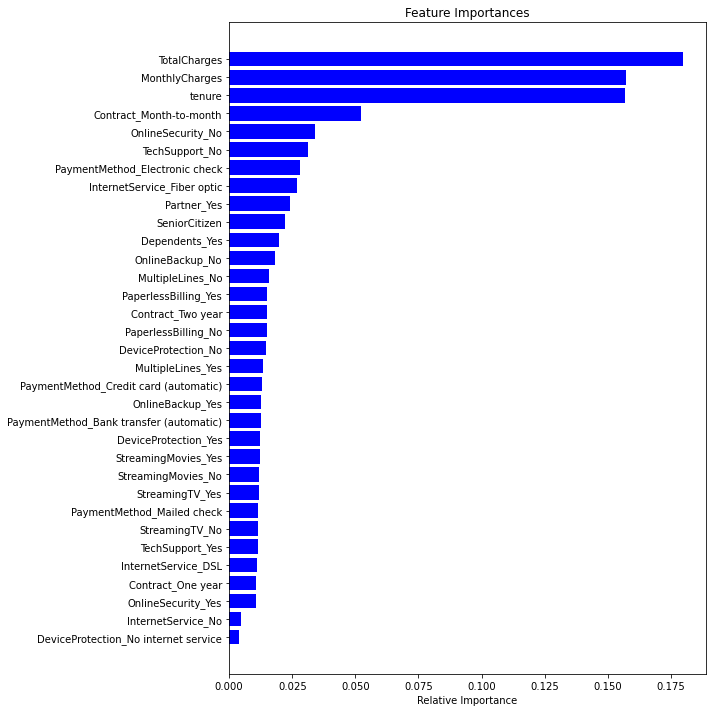

In [77]:
## Feature Importance 
features = df1.columns
importances = Rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

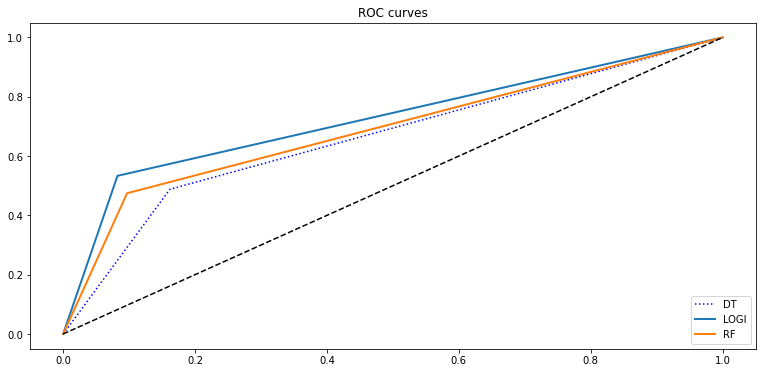

In [78]:
fig, ax = plt.subplots()
ax.plot(false_positive_rate, true_positive_rate, "b:", label="DT")
ax.plot(false_positive_rate1, true_positive_rate1, linewidth=2, label="LOGI")
ax.plot(false_positive_rate2, true_positive_rate2, linewidth=2, label="RF")
ax.plot([0, 1], [0, 1], 'k--')
ax.legend(loc=4);
ax.set_title('ROC curves');

In [79]:
criterion = ['entropy','gini']
max_depth = [3,4,5,10,12]
for cr in criterion:
    for max_dep in max_depth:
        print('\033[1m' + "\n{}".format(cr) + " {}".format(max_dep) + '\033[0m')
        Dtree=DecisionTreeClassifier(criterion=cr, max_depth=max_dep,random_state=121).fit(x_train,y_train)
        print(Dtree.score(x_test,y_test))


entropy 3
0.7803837953091685

entropy 4
0.7761194029850746

entropy 5
0.7782515991471215

entropy 10
0.7455579246624022

entropy 12
0.7484008528784648

gini 3
0.7803837953091685

gini 4
0.7761194029850746

gini 5
0.775408670931059

gini 10
0.7455579246624022

gini 12
0.7327647476901208


In [80]:
Dtree=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=100,max_features='sqrt',random_state=121).fit(x_train,y_train)
print(Dtree.score(x_test,y_test))

0.757640369580668


# PCA and Grid Search

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

In [86]:
x_train_reduced = pca.fit_transform(x_train)

In [87]:
#checking the number of components (features) present in the X_train_reduced dataset
pca.n_components_

20

In [88]:
#checking if we have hit a total of 99% explained variance ratio with the select number of components
np.sum(pca.explained_variance_ratio_)

0.9949112061695132

In [89]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = [
    {
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[5,10, 15],
    }]

In [91]:
log_clf_ens = LogisticRegression(solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [92]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring='neg_mean_squared_error')

In [93]:
grid_search.fit(x_train_reduced, y_train)

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        random_state=42)),
                                                    ('rf',
                                                     RandomForestClassifier(max_depth=10,
                                                                            n_estimators=20,
                                                                            random_state=42))],
                                        voting='soft'),
             param_grid=[{'lr__C': [5], 'lr__solver': ['lbfgs'],
                          'rf__max_depth': [5, 10, 15],
                          'rf__n_estimators': [20]}],
             scoring='neg_mean_squared_error')

In [94]:
# The best hyperparameter combinations

grid_search.best_params_

{'lr__C': 5, 'lr__solver': 'lbfgs', 'rf__max_depth': 5, 'rf__n_estimators': 20}

In [95]:
# Get the best estimator

grid_search.best_estimator_

VotingClassifier(estimators=[('lr', LogisticRegression(C=5, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=20,
                                                     random_state=42))],
                 voting='soft')

In [96]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.44522154285504 {'lr__C': 5, 'lr__solver': 'lbfgs', 'rf__max_depth': 5, 'rf__n_estimators': 20}
0.44542114902640173 {'lr__C': 5, 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
0.45077710678338584 {'lr__C': 5, 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


In [97]:
final_model = grid_search.best_estimator_

In [98]:
x_test_reduced = pca.transform(x_test)

In [99]:
pca.n_components_

20

In [100]:
y_test_predict = final_model.predict(x_test_reduced)

In [101]:
confusion_matrix(y_test, y_test_predict)

array([[962,  70],
       [203, 172]], dtype=int64)

In [102]:
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')

In [103]:
print( final_accuracy, final_precision, final_recall, final_f1_score)

0.8059701492537313 0.7950988151499445 0.8059701492537313 0.7909306955579146
